In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel.csv')

In [3]:
df.head(5)

,hardware_id,created_at,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
0,abcdefgh,2019-06-27T23:16:00.000Z,72350.99986,0,406,404,233,236,233,17.125,16.500,18.750
1,abcdefgh,2019-06-27T23:15:00.000Z,72328.45597,0,406,404,233,237,234,17.000,16.500,18.750
2,abcdefgh,2019-06-27T23:13:00.000Z,72306.34808,0,408,404,234,236,234,17.000,16.875,18.750
3,abcdefgh,2019-06-27T23:11:00.000Z,72284.64116,0,406,404,233,236,234,17.125,16.625,18.750
4,abcdefgh,2019-06-27T23:09:00.000Z,72263.26715,0,406,402,232,235,233,17.000,16.750,18.375


In [4]:
df.describe()

,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
count,572.000000,572.0,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,66411.311441,0.0,405.720280,402.454545,231.984266,235.720280,232.923077,11.330911,11.058239,11.984156
std,3614.438586,0.0,3.573409,3.658308,2.267125,2.030953,2.034129,6.327414,6.149625,6.486260
min,59945.008030,0.0,398.000000,394.000000,227.000000,231.000000,228.000000,6.250000,6.093750,5.906250
25%,63325.162538,0.0,404.000000,400.000000,230.000000,234.000000,231.750000,6.437500,6.281250,7.062500
50%,66859.786005,0.0,406.000000,402.000000,232.000000,236.000000,233.000000,6.500000,6.343750,7.218750
75%,69457.583840,0.0,408.000000,404.000000,233.250000,237.000000,234.000000,19.875000,19.250000,20.250000
max,72350.999860,0.0,416.000000,412.000000,238.000000,241.000000,239.000000,20.750000,20.625000,22.000000


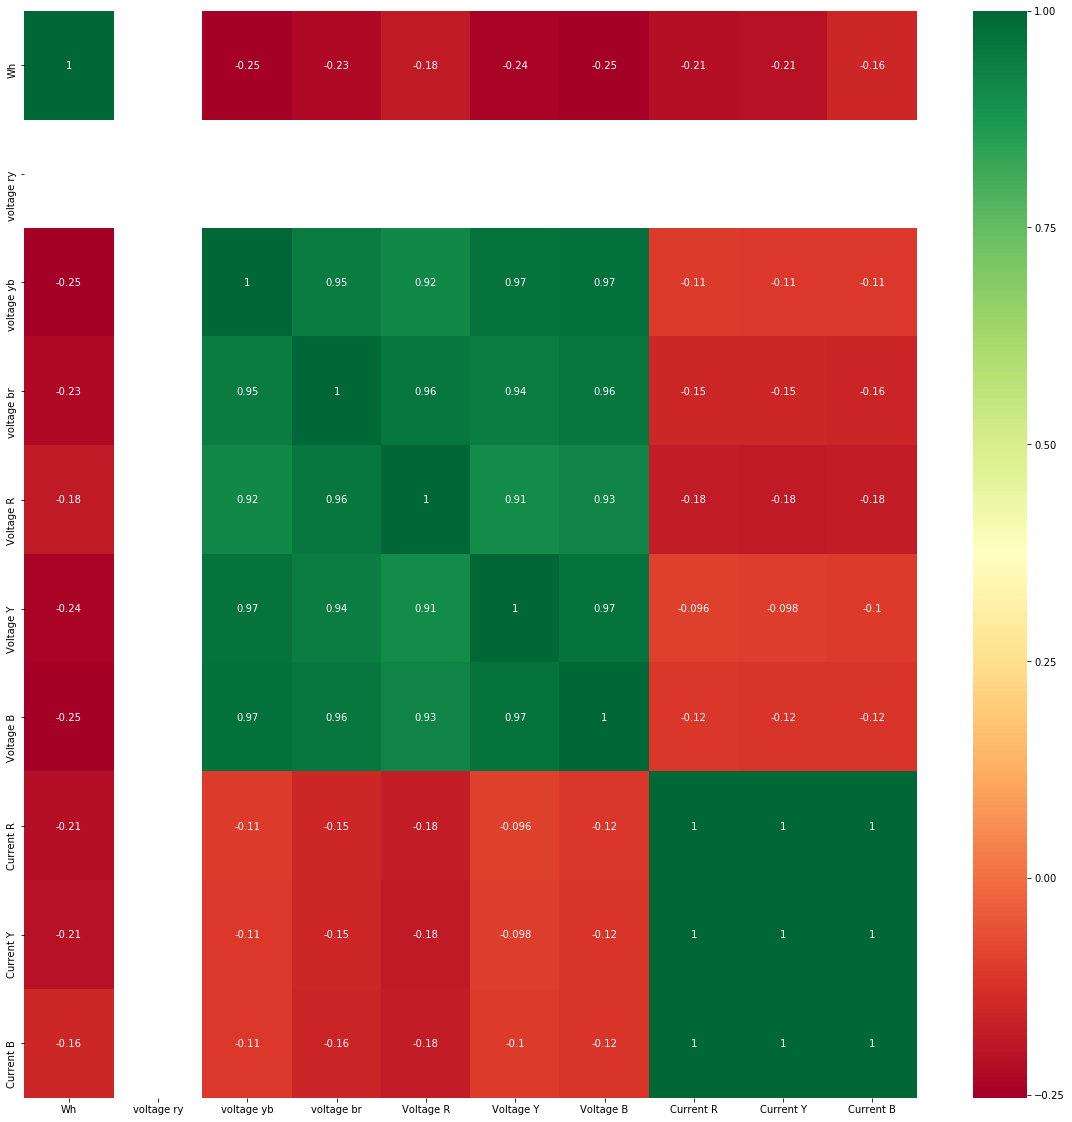

In [5]:
#check correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

there is positive correlation between
voltage yb and voltage br,voltage R , voltage Y, voltage B
voltage br and voltage yb,voltage R , voltage Y, voltage B
voltage R and voltage yb,voltage br , voltage Y, voltage B
voltage Y and voltage yb,voltage br , voltage R, voltage B
voltage B and voltage yb,voltage br , voltage R, voltage Y

in 3 phase system voltage between R-Y or Y-B or R-B is line voltage
While voltage between any Phase and neutral is Phase voltage say R phase to neutral is Phase voltage
In Three phase star connection phase Voltage and Line voltage have different values Ratio of line to phase voltage is √3
While in delta connection line and phase voltage is same
Generally line voltage is 400V and phase voltage is 230V (which we used for residential purpose)

voltage yb,br,ry are line voltages
voltage R,Y,B are phase voltages

Given system is a three phase star connection
In star connected circuits,
Line voltage is equal to √3 times the phase voltage with lead of 30°.

VRY = VR – VY …. (Vector Difference)
phase angle = 90
let phase voltage = 230

In [6]:
df['phase power']=((df['Voltage R']+df['Voltage Y']+df['Voltage B'])/3) * ((df['Current R']+df['Current Y']+df['Current B'])/3) * (3 ** 0.5) * 0.5

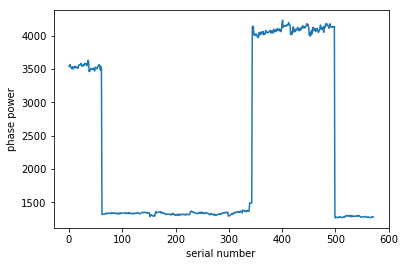

In [7]:
values=df['phase power']
# use the plot function
plt.plot(values)
plt.xlabel("serial number")
plt.ylabel("phase power")
plt.show()

In [8]:
df['instantaneous power']=df['Voltage R']*df['Current R'] + df['Voltage Y']*df['Current Y'] + df['Voltage B']*df['Current B']

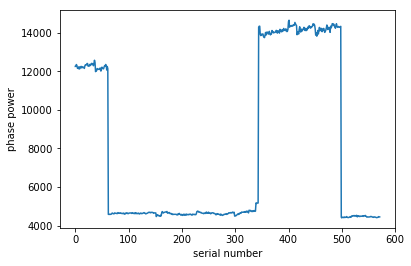

In [9]:
values=df['instantaneous power']
# use the plot function
plt.plot(values)
plt.xlabel("serial number")
plt.ylabel("phase power")
plt.show()

it can be observed from the above graphs that there was some faults in the electical system in dates of serial 60 to 330 and 500 to 580.
also it can be seen from the given data that the voltages at these points remain same but the current reduce considerably

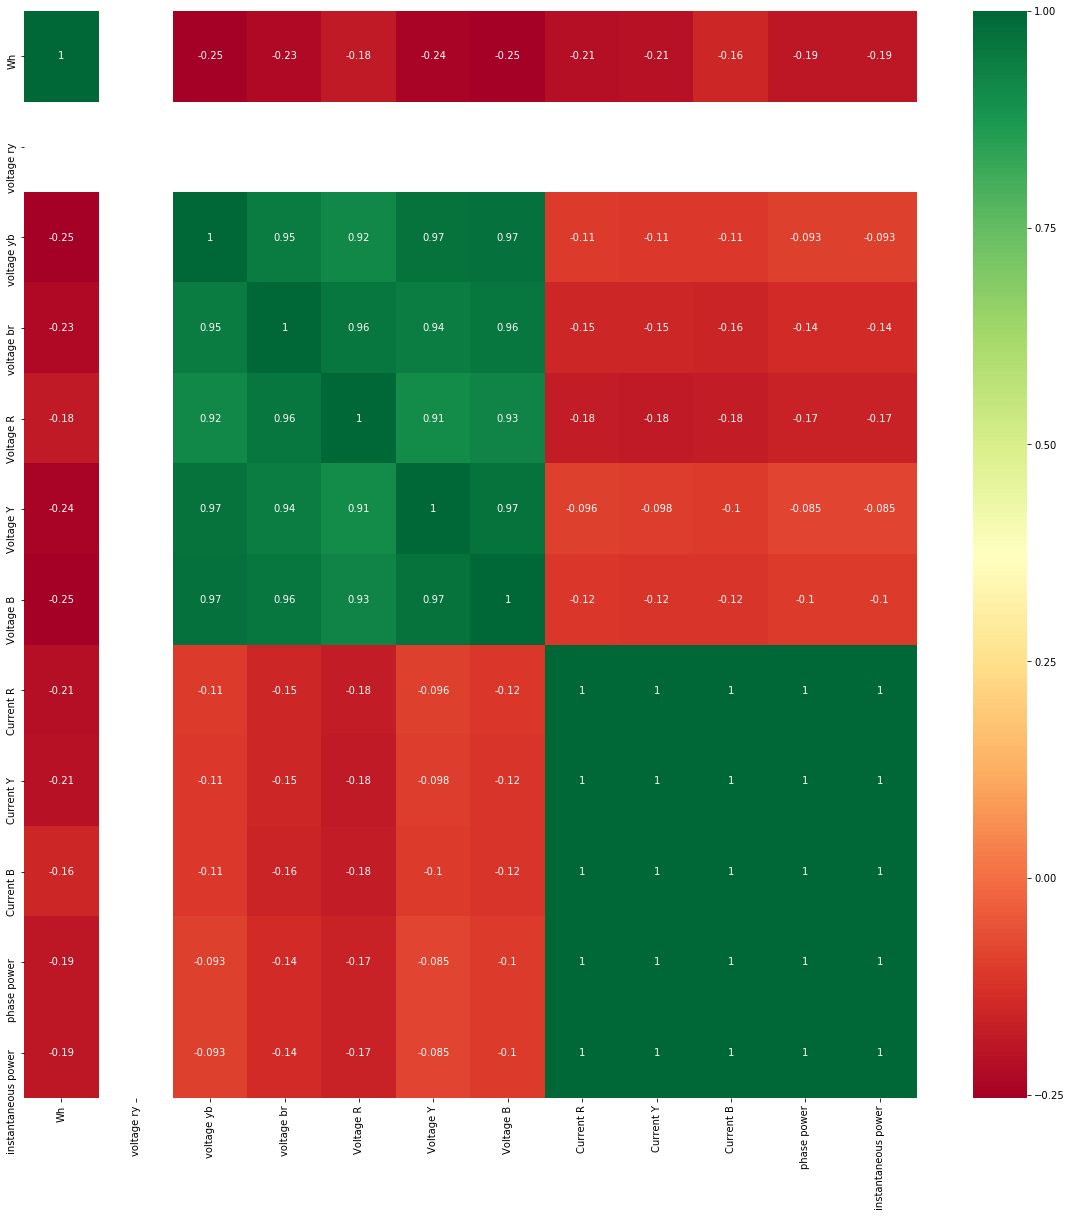

In [10]:
#check correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
y=df['instantaneous power']

In [12]:
x=df['Current R']

In [13]:
from matplotlib import style

In [14]:
style.use("ggplot")

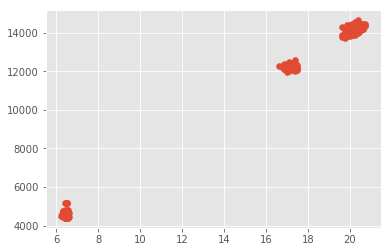

In [15]:
plt.scatter(x,y)
plt.show()

there are 3 clusters

In [16]:
data=df.drop(['hardware_id', 'created_at'], axis=1)

In [17]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.984772,0.0,0.005526,0.005499,0.003171,0.003212,0.003171,0.000233,0.000225,0.000255,0.048155,0.166774
1,0.984748,0.0,0.005528,0.005500,0.003172,0.003227,0.003186,0.000231,0.000225,0.000255,0.048191,0.166906
2,0.984522,0.0,0.005555,0.005501,0.003186,0.003213,0.003186,0.000231,0.000230,0.000255,0.048540,0.168130
3,0.984628,0.0,0.005530,0.005503,0.003174,0.003215,0.003187,0.000233,0.000226,0.000255,0.048376,0.167560
4,0.984957,0.0,0.005534,0.005479,0.003162,0.003203,0.003176,0.000232,0.000228,0.000250,0.047856,0.165764


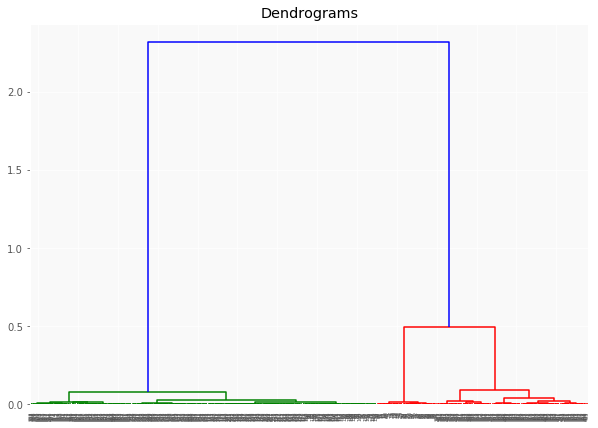

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

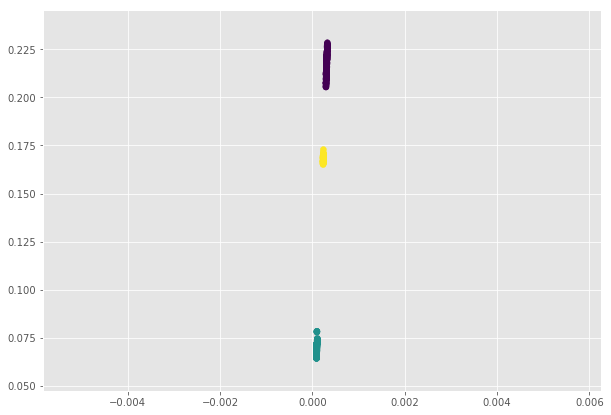

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[7], data_scaled[11], c=cluster.labels_)  #current R and instantaneous power

# classification analysis using PCA and machine learning algorithms

In [21]:
df.head()

,hardware_id,created_at,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B,phase power,instantaneous power
0,abcdefgh,2019-06-27T23:16:00.000Z,72350.99986,0,406,404,233,236,233,17.125,16.500,18.750,3537.930281,12252.875
1,abcdefgh,2019-06-27T23:15:00.000Z,72328.45597,0,406,404,233,237,234,17.000,16.500,18.750,3539.542050,12259.000
2,abcdefgh,2019-06-27T23:13:00.000Z,72306.34808,0,408,404,234,236,234,17.000,16.875,18.750,3564.945462,12348.000
3,abcdefgh,2019-06-27T23:11:00.000Z,72284.64116,0,406,404,233,236,234,17.125,16.625,18.750,3551.425843,12301.125
4,abcdefgh,2019-06-27T23:09:00.000Z,72263.26715,0,406,402,232,235,233,17.000,16.750,18.375,3511.011325,12161.625


In [22]:
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 

In [23]:
features=['voltage ry','voltage yb','voltage br','Voltage R','Voltage Y','Voltage B','Current R','Current Y','Current B']
target=['Wh']

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
xr=df.loc[:,features].values

In [27]:
xr=scaler.fit_transform(xr)

In [28]:
pca = PCA(n_components = 1)
xr = pca.fit_transform(xr) 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
labelencoder = LabelEncoder()

In [31]:
yr=df.loc[:,target].values

In [32]:
yr=labelencoder.fit_transform(yr)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [35]:
classifiers = {
    
    "random forest":RandomForestClassifier(n_estimators=100),
    "decision tree":DecisionTreeClassifier(random_state=0),
   
    "support vector machine":svm.SVC(kernel='rbf', gamma=1,random_state=0) 
   
}

In [36]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
        
    if clf_name=="random forest":
        clf.fit(xr, yr)
        
        y_pred = clf.predict(xr)
    elif clf_name=="decision tree":
        clf.fit(xr, yr)
        
        y_pred = clf.predict(xr)
    elif clf_name=="knn":
        clf.fit(xr, yr)
       
        y_pred = clf.predict(xr)
    elif clf_name == "support vector machine":
        y_pred = clf.fit(xr,yr).predict(xr)
    
    n_errors = (y_pred != yr).sum()
    # Run Classification Metrics
    print("model name=",clf_name,"\nnumber of errors=",n_errors)
    print("Accuracy Score :")
    print(accuracy_score(yr,y_pred))
    print("\n\n")

model name= random forest 
number of errors= 8
Accuracy Score :
0.986013986013986



model name= decision tree 
number of errors= 8
Accuracy Score :
0.986013986013986



model name= support vector machine 
number of errors= 8
Accuracy Score :
0.986013986013986



